Análisis Exploratorio de Datos (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_items = pd.read_csv('olist_order_items_dataset.csv')
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_geo = pd.read_csv('olist_geolocation_dataset.csv')

## 1. Carga e inspección de datos

En esta sección se cargan los cinco datasets de Olist: payments, orders, items, customers y geolocation. Se verifican sus dimensiones, nombres de columnas y primeras filas para identificar su estructura general.


In [3]:
for df_name, df in zip(['Payments', 'Orders', 'Order Items', 'Customers', 'Geolocation'],
                       [df_payments, df_orders, df_items, df_customers, df_geo]):
    print(f'{df_name}: shape {df.shape}')
    print(df.columns)
    print(df.head())


Payments: shape (103886, 5)
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  
Orders: shape (99441, 8)
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
  

In [4]:
for df_name, df in zip(['Payments', 'Orders', 'Order Items', 'Customers', 'Geolocation'],
                       [df_payments, df_orders, df_items, df_customers, df_geo]):
    print(f'{df_name}:')
    print(df.info())


Payments:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
Orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99

**Observaciones:**
- Todos los datasets tienen un número considerable de registros y estructuras coherentes.
- Las columnas de identificación (`order_id`, `customer_id`) se repiten en varios archivos, lo que permitirá unirlos posteriormente.
- Los tipos de datos son adecuados (números, cadenas, fechas).


## 2. Revisión de valores nulos y duplicados

Aquí se identifican columnas con valores faltantes y registros duplicados, para determinar si será necesario un proceso de limpieza.


In [5]:
for df_name, df in zip(['Payments', 'Orders', 'Order Items', 'Customers', 'Geolocation'],
                       [df_payments, df_orders, df_items, df_customers, df_geo]):
    print(f'Valores nulos en {df_name}:')
    print(df.isnull().sum())
    print(f'Duplicados en {df_name}: {df.duplicated().sum()}')


Valores nulos en Payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Duplicados en Payments: 0
Valores nulos en Orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Duplicados en Orders: 0
Valores nulos en Order Items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Duplicados en Order Items: 0
Valores nulos en Customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


**Observaciones:**
- El dataset `orders` presenta valores nulos en fechas de aprobación y entrega, probablemente por órdenes canceladas o incompletas.
- Los demás datasets tienen pocos o ningún valor nulo.
- No se encontraron registros duplicados relevantes.


In [6]:
for df_name, df in zip(['Payments', 'Orders', 'Order Items', 'Customers', 'Geolocation'],
                       [df_payments, df_orders, df_items, df_customers, df_geo]):
    print(f'Describe {df_name}:')
    print(df.describe())


Describe Payments:
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000
Describe Orders:
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   
freq                                   1                                 1   

      

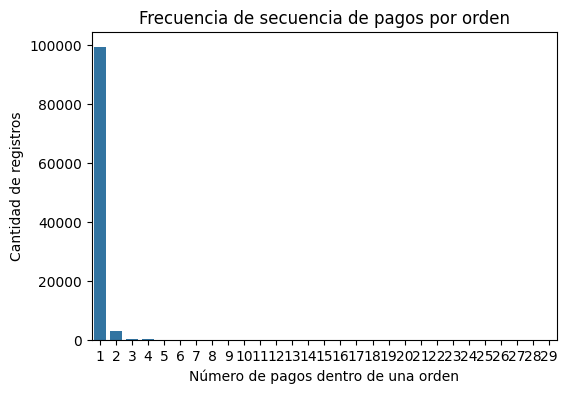

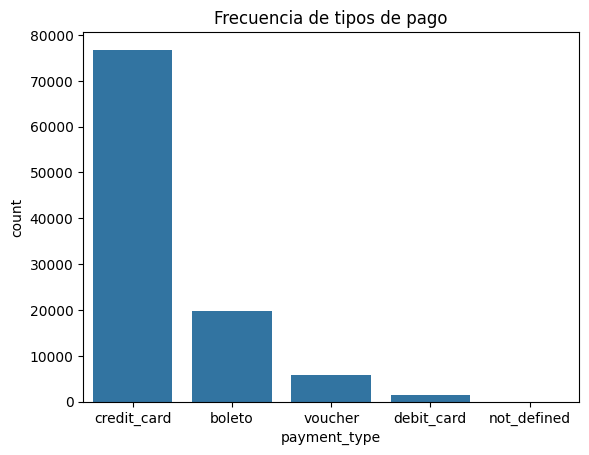

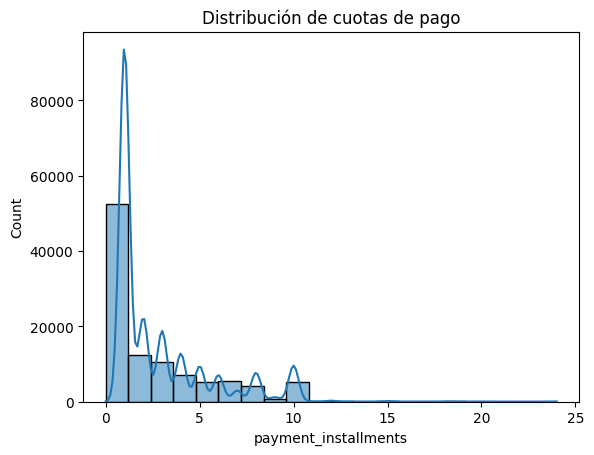

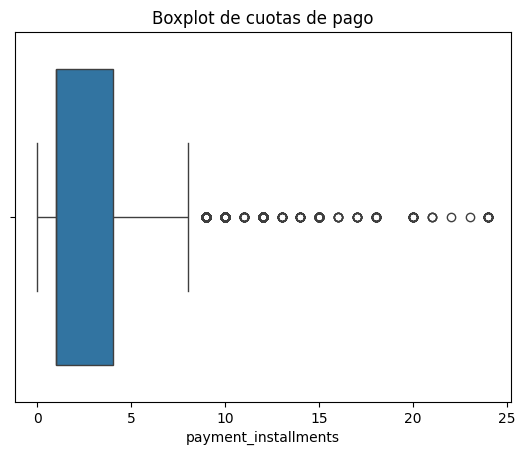

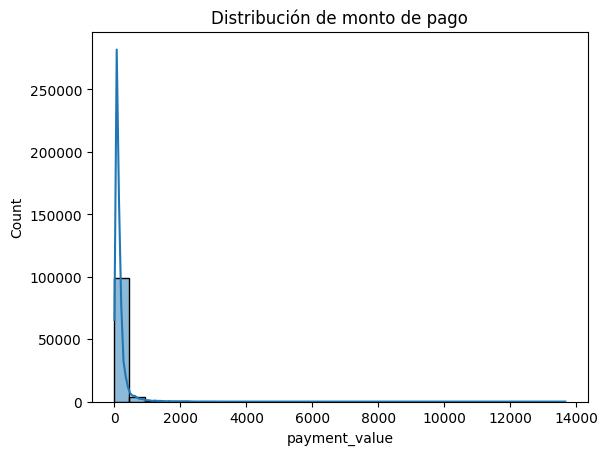

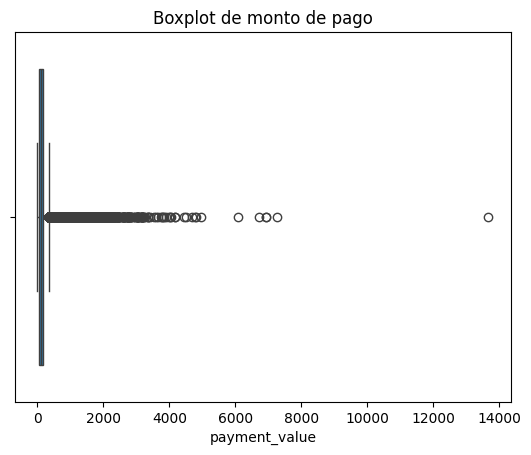

In [14]:
# Para dataset payments
# payment_sequential (número de pagos por orden)
plt.figure(figsize=(6,4))
sns.countplot(x='payment_sequential', data=df_payments)
plt.title('Frecuencia de secuencia de pagos por orden')
plt.xlabel('Número de pagos dentro de una orden')
plt.ylabel('Cantidad de registros')
plt.show()

# payment_type (categoría)
sns.countplot(x='payment_type', data=df_payments)
plt.title('Frecuencia de tipos de pago')
plt.show()

# payment_installments (numérico)
sns.histplot(df_payments['payment_installments'], bins=20, kde=True)
plt.title('Distribución de cuotas de pago')
plt.show()
sns.boxplot(x=df_payments['payment_installments'])
plt.title('Boxplot de cuotas de pago')
plt.show()

# payment_value (numérico)
sns.histplot(df_payments['payment_value'], bins=30, kde=True)
plt.title('Distribución de monto de pago')
plt.show()
sns.boxplot(x=df_payments['payment_value'])
plt.title('Boxplot de monto de pago')
plt.show()


**Insigths:**

**payment_sequential:**  
- La mayoría de las órdenes presentan un único pago (`payment_sequential = 1`).  
- Menos del 1% de las órdenes tienen múltiples pagos, lo que indica que los pagos fraccionados son casos atípicos.

**payment_type:**  
- El método de pago más frecuente es la tarjeta de crédito, seguida de boletos bancarios y débito.  
- Los métodos menos utilizados (como vouchers) representan una fracción mínima, mostrando baja diversidad de medios de pago.

**payment_installments:**  
- La mayor parte de los pagos se realizan en una sola cuota; sin embargo, hay una distribución que se extiende hasta 24 cuotas.  
- La dispersión sugiere que algunos clientes financian sus compras a largo plazo, aunque es poco común.

**payment_value:**  
- Los montos de pago presentan una alta concentración en valores bajos, con pocos casos de pagos altos que actúan como *outliers*.  
- Esto indica que la mayoría de las transacciones en la plataforma corresponden a compras pequeñas o medianas.



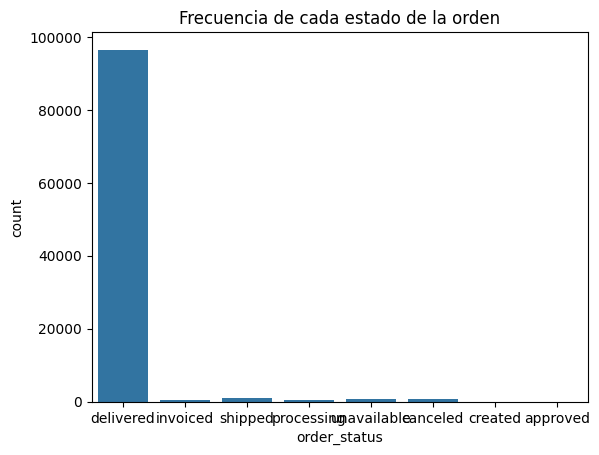

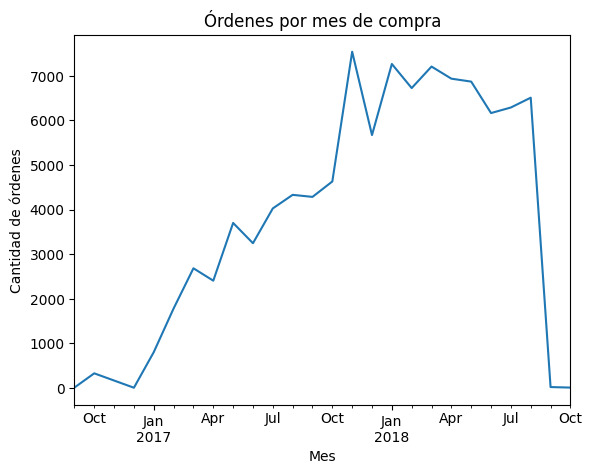

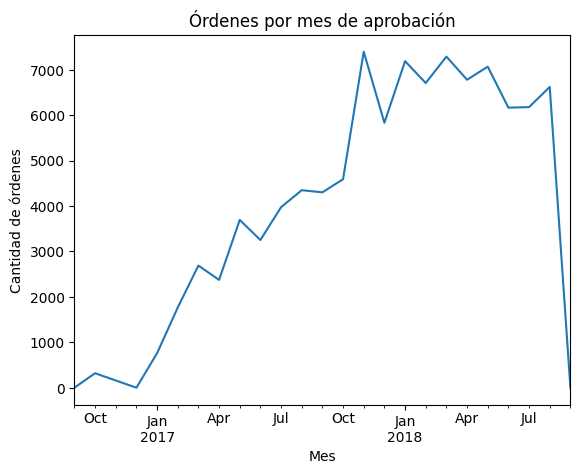

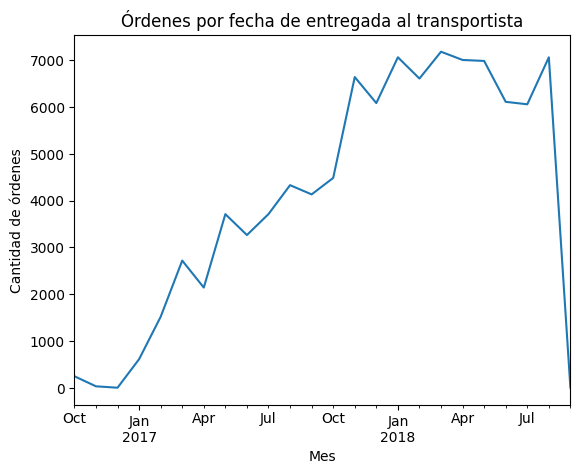

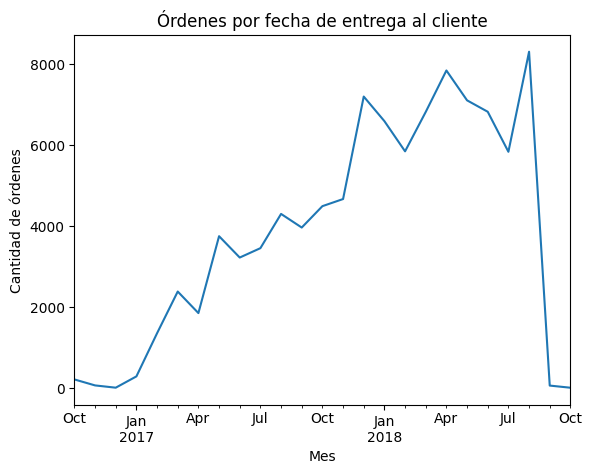

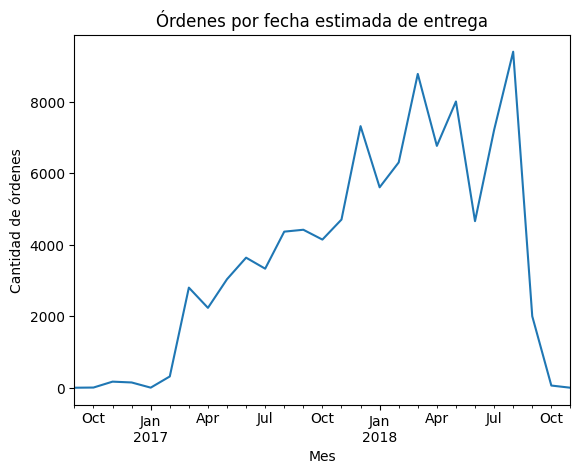

In [8]:
# Para dataset orders
# order_status
sns.countplot(x='order_status', data=df_orders)
plt.title('Frecuencia de cada estado de la orden')
plt.show()

# order_purchase_timestamp
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_purchase_timestamp'].dt.to_period('M').value_counts().sort_index().plot()
plt.title('Órdenes por mes de compra')
plt.ylabel('Cantidad de órdenes')
plt.xlabel('Mes')
plt.show()

# order_approved_at
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_approved_at'].dt.to_period('M').value_counts().sort_index().plot()
plt.title('Órdenes por mes de aprobación')
plt.ylabel('Cantidad de órdenes')
plt.xlabel('Mes')
plt.show()

# order_delivered_carrier_date
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_carrier_date'].dt.to_period('M').value_counts().sort_index().plot()
plt.title('Órdenes por fecha de entregada al transportista')
plt.ylabel('Cantidad de órdenes')
plt.xlabel('Mes')
plt.show()

# order_delivered_customer_date
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_delivered_customer_date'].dt.to_period('M').value_counts().sort_index().plot()
plt.title('Órdenes por fecha de entrega al cliente')
plt.ylabel('Cantidad de órdenes')
plt.xlabel('Mes')
plt.show()

# order_estimated_delivery_date
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])
df_orders['order_estimated_delivery_date'].dt.to_period('M').value_counts().sort_index().plot()
plt.title('Órdenes por fecha estimada de entrega')
plt.ylabel('Cantidad de órdenes')
plt.xlabel('Mes')
plt.show()


**Insights:**

**order_status:**  
- La mayoría de las órdenes tienen estado “delivered”, lo que indica que el proceso logístico generalmente se completa.  
- Los estados “canceled” y “unavailable” son minoritarios, pero evidencian algunos problemas operativos o desistimientos.

**order_purchase_timestamp:**  
- Se observa un patrón regular de órdenes mensuales, con picos en ciertos periodos del año.  
- Los datos permiten identificar estacionalidad o eventos de alta demanda.

**order_approved_at:**  
- La mayoría de los pedidos son aprobados en las mismas fechas de compra, reflejando eficiencia en la confirmación de pagos.  
- Pocas órdenes presentan retraso en la aprobación, lo que podría deberse a métodos de pago específicos.

**order_delivered_carrier_date:**  
- La entrega al transportista sigue un comportamiento similar al de las fechas de aprobación.  
- Algunos retrasos o valores ausentes pueden deberse a tiempos de procesamiento logístico.

**order_delivered_customer_date:**  
- El tiempo de entrega al cliente se concentra en ciertos periodos, evidenciando consistencia en la logística.  
- Los valores nulos o extremos podrían representar órdenes no completadas o retrasadas.

**order_estimated_delivery_date:**  
- La mayoría de las entregas estimadas se concentran dentro de plazos regulares.  
- Comparar esta columna con la fecha real de entrega permite medir precisión logística.

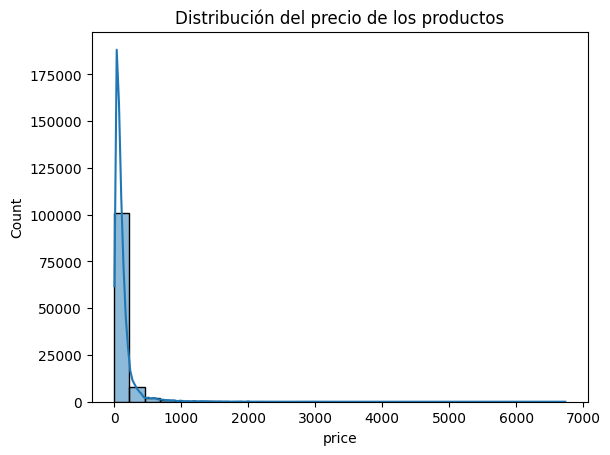

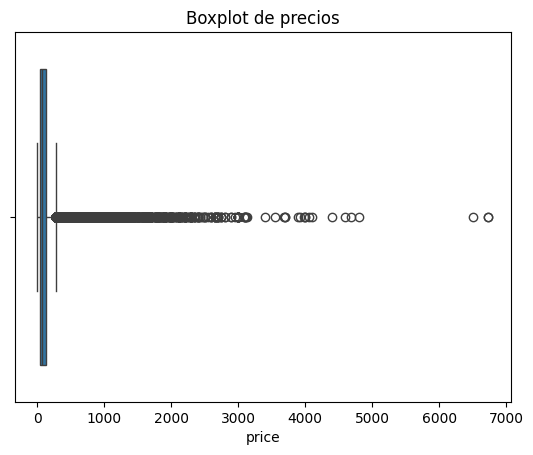

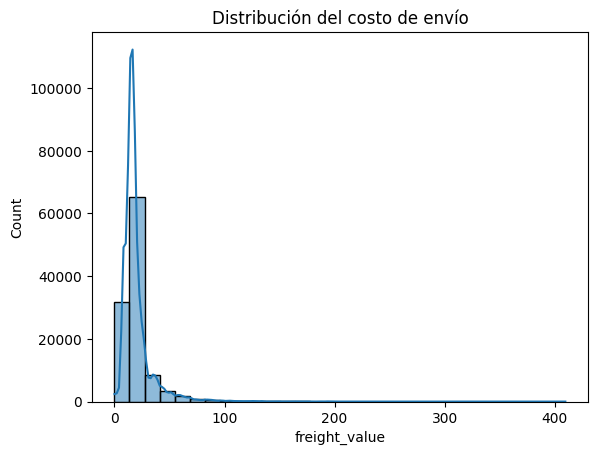

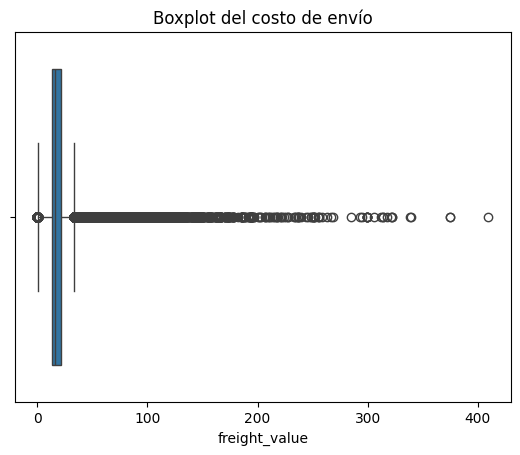

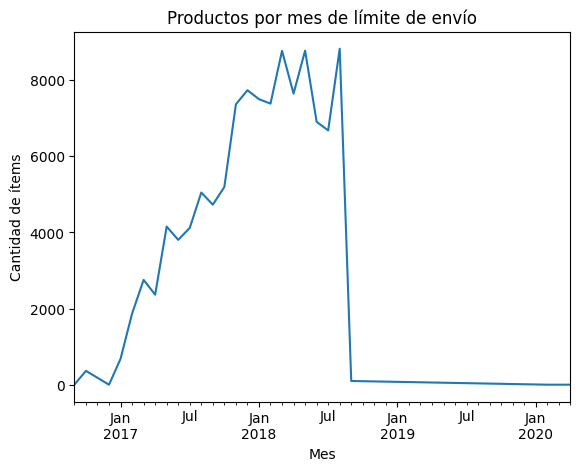

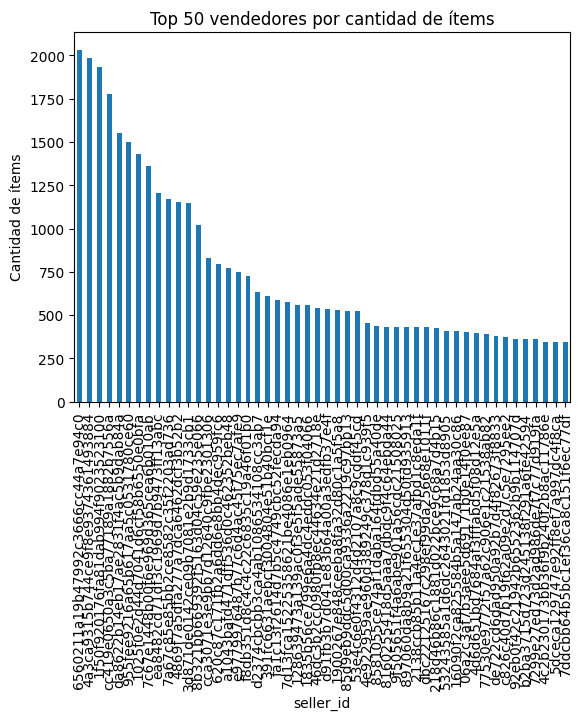

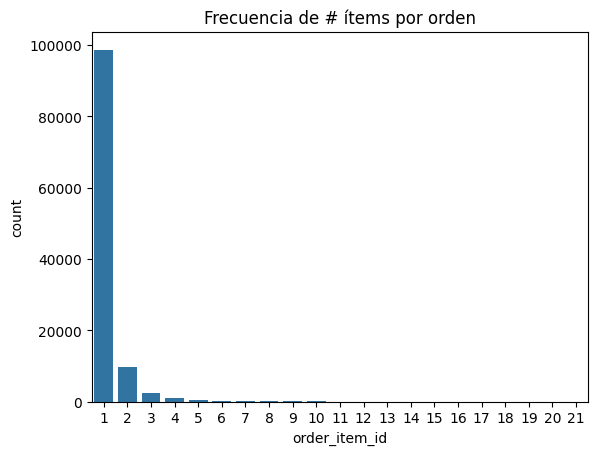

In [9]:
# Para dataset order items
# price
sns.histplot(df_items['price'], bins=30, kde=True)
plt.title('Distribución del precio de los productos')
plt.show()
sns.boxplot(x=df_items['price'])
plt.title('Boxplot de precios')
plt.show()

# freight_value
sns.histplot(df_items['freight_value'], bins=30, kde=True)
plt.title('Distribución del costo de envío')
plt.show()
sns.boxplot(x=df_items['freight_value'])
plt.title('Boxplot del costo de envío')
plt.show()

# shipping_limit_date (pro tip: convierte a fecha)
df_items['shipping_limit_date'] = pd.to_datetime(df_items['shipping_limit_date'], errors='coerce')
df_items['shipping_limit_date'].dt.to_period('M').value_counts().sort_index().plot()
plt.title('Productos por mes de límite de envío')
plt.ylabel('Cantidad de ítems')
plt.xlabel('Mes')
plt.show()

# seller_id (top 50 vendedores por cantidad de ítems vendidos)
top_sellers = df_items['seller_id'].value_counts().head(50)
top_sellers.plot(kind='bar')
plt.title('Top 50 vendedores por cantidad de ítems')
plt.ylabel('Cantidad de ítems')
plt.show()

# order_item_id (conteo de ítems por orden)
sns.countplot(x='order_item_id', data=df_items)
plt.title('Frecuencia de # ítems por orden')
plt.show()


**Insights:**

**seller_id:**  
- El número de vendedores es alto, lo que muestra diversidad de oferta en la plataforma.  
- Los 50 principales concentran gran parte de las ventas.

**shipping_limit_date:**  
- Las fechas se distribuyen regularmente a lo largo del tiempo, reflejando actividad constante.  
- Permite analizar los plazos de envío y tiempos máximos definidos por los vendedores.

**price:**  
- Los precios muestran alta concentración en valores bajos, con algunos productos de alto valor.  
- Existen *outliers* que representan productos premium o categorías con precios elevados.

**freight_value:**  
- Los costos de envío siguen una distribución sesgada a la derecha, con la mayoría en valores bajos.  
- Algunos envíos presentan altos costos, posiblemente por distancia o volumen.


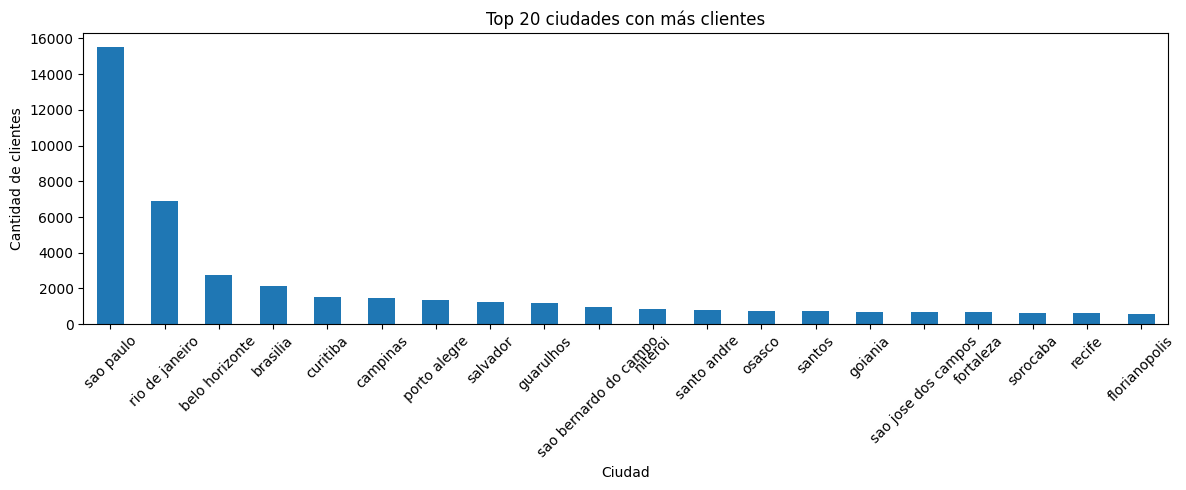

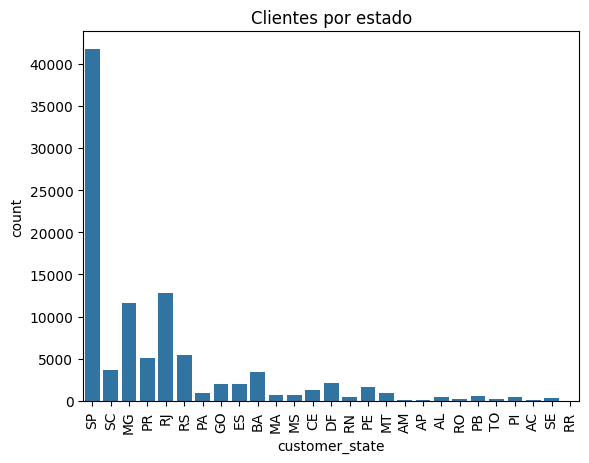

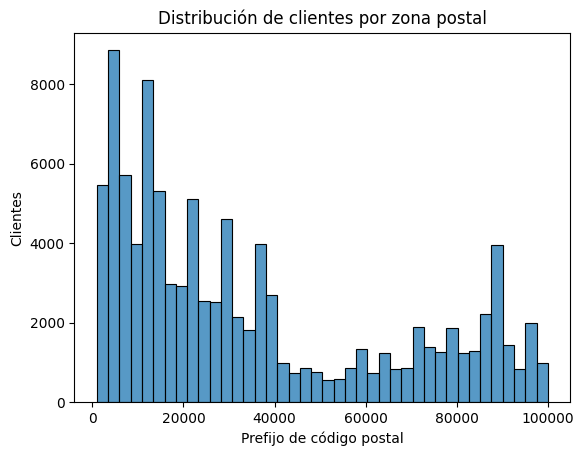

In [10]:
# Para dataset customer
# customer_city (todos los valores)
top_cities = df_customers['customer_city'].value_counts().head(20)
plt.figure(figsize=(12,5))
top_cities.plot(kind='bar')
plt.title('Top 20 ciudades con más clientes')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# customer_state
sns.countplot(x='customer_state', data=df_customers)
plt.title('Clientes por estado')
plt.xticks(rotation=90)
plt.show()

# customer_zip_code_prefix
plt.figure()
sns.histplot(df_customers['customer_zip_code_prefix'], bins=40)
plt.title('Distribución de clientes por zona postal')
plt.xlabel('Prefijo de código postal')
plt.ylabel('Clientes')
plt.show()


**Insights:**

**customer_zip_code_prefix:**  
- La distribución muestra mayor densidad en ciertos rangos, lo que indica concentración geográfica de clientes.  
- Permite identificar las zonas más activas en compras.

**customer_city:**  
- Las ciudades con más clientes son São Paulo, Rio de Janeiro y Belo Horizonte.  
- Existe una fuerte centralización de la demanda en grandes centros urbanos.

**customer_state:**  
- Los estados con más clientes coinciden con las principales ciudades.  
- Muestra la cobertura nacional del comercio electrónico con mayor actividad en el sudeste de Brasil.


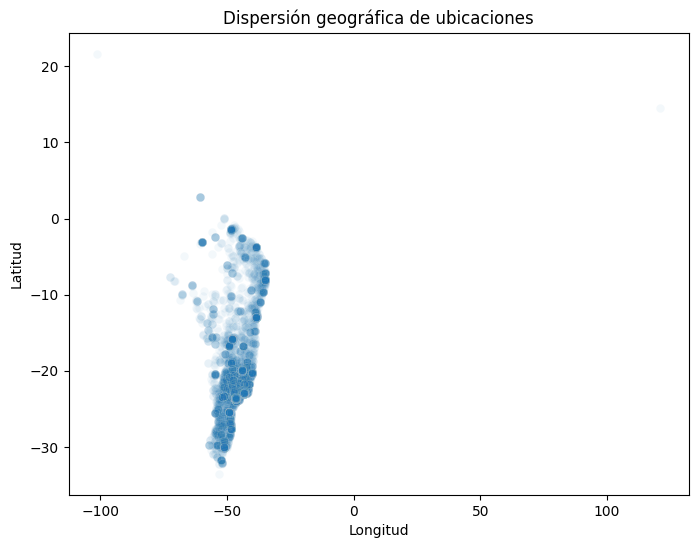

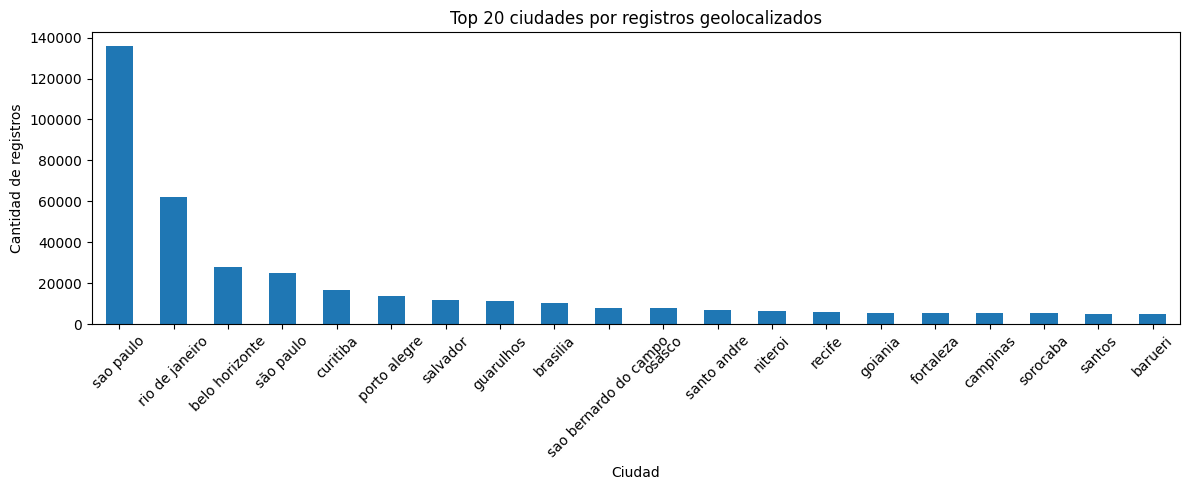

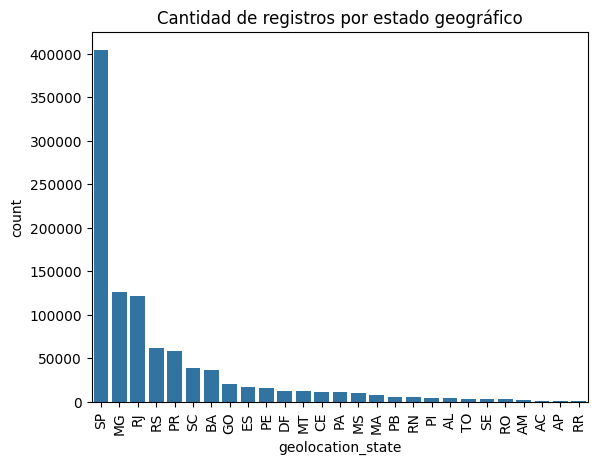

In [11]:
# Para geolocalizacion
# Dispersión geográfica (puede ser pesado, usar sample si son muchos datos)
sample_geo = df_geo.sample(10000) if len(df_geo) > 10000 else df_geo
plt.figure(figsize=(8,6))
sns.scatterplot(x='geolocation_lng', y='geolocation_lat', data=sample_geo, alpha=0.05)
plt.title('Dispersión geográfica de ubicaciones')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

# Top 20 ciudades por registros
top_geo_cities = df_geo['geolocation_city'].value_counts().head(20)
plt.figure(figsize=(12,5))
top_geo_cities.plot(kind='bar')
plt.title('Top 20 ciudades por registros geolocalizados')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Estados
sns.countplot(x='geolocation_state', data=df_geo, order=df_geo['geolocation_state'].value_counts().index)
plt.title('Cantidad de registros por estado geográfico')
plt.xticks(rotation=90)
plt.show()


**Insights:**

**geolocation_lat / geolocation_lng:**  
- Las coordenadas muestran una fuerte concentración de puntos en el sureste de Brasil.  
- La dispersión general indica presencia en casi todo el territorio nacional.

**geolocation_city:**  
- Sao Paulo es la ciudad con más registros, seguida por Rio de Janeiro y otras capitales.  


**geolocation_state:**  
- Sao Paulo (SP) y Rio de Janeiro (RJ) concentran la mayoría de los registros.  
- Refleja los focos comerciales y poblacionales del país.


## 8. Cruce de datasets y análisis de correlaciones

Se combinan los datasets principales (`orders`, `items`, `payments`, `customers`) para observar relaciones entre variables numéricas y analizar correlaciones.


In [12]:
# Cruzar tablas para analizar correlaciones
df_orders_items = pd.merge(df_orders, df_items, on='order_id', how='inner')
df_full = pd.merge(df_orders_items, df_payments, on='order_id', how='inner')
df_full = pd.merge(df_full, df_customers, on='customer_id', how='inner')


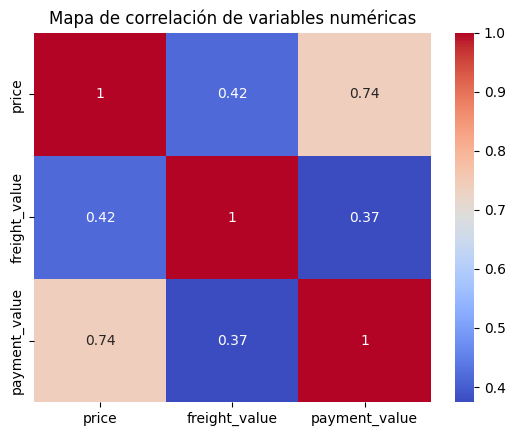

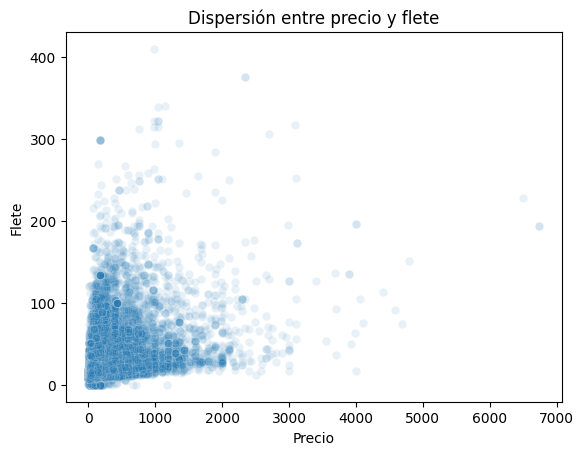

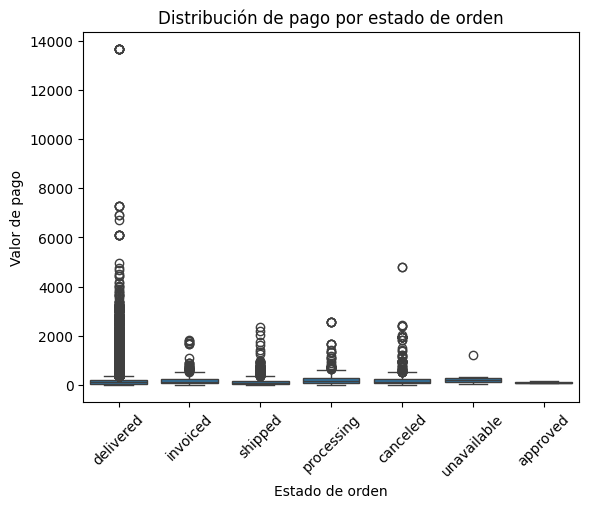

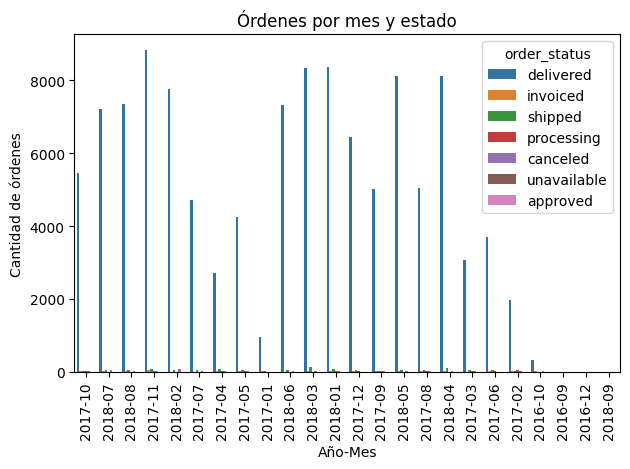

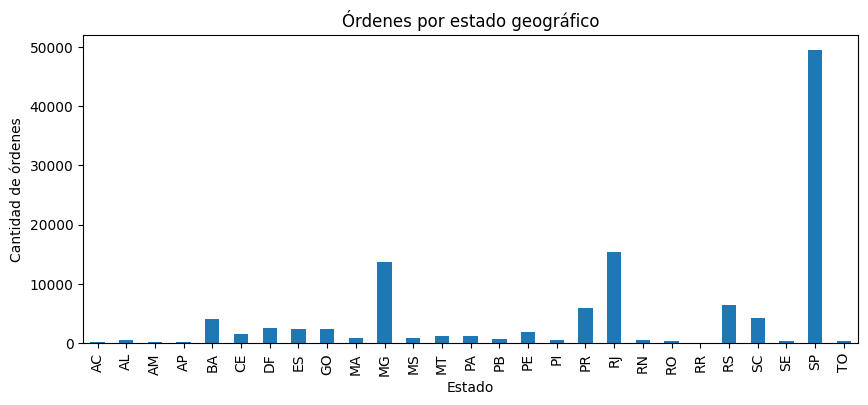

In [13]:
# Analizis de correlaciones
#----- 1. Mapa de calor de correlación numérica -----
numeric_cols = ['price', 'freight_value', 'payment_value']
sns.heatmap(df_full[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de correlación de variables numéricas')
plt.show()

#----- 2. Scatterplot entre precio y flete -----
sns.scatterplot(x='price', y='freight_value', data=df_full, alpha=0.1)
plt.title('Dispersión entre precio y flete')
plt.xlabel('Precio')
plt.ylabel('Flete')
plt.show()

#----- 3. Boxplot de pago según estado de orden -----
sns.boxplot(x='order_status', y='payment_value', data=df_full)
plt.title('Distribución de pago por estado de orden')
plt.ylabel('Valor de pago')
plt.xlabel('Estado de orden')
plt.xticks(rotation=45)
plt.show()

#----- 4. Evolución mensual de órdenes por estado -----
df_full['order_purchase_timestamp'] = pd.to_datetime(df_full['order_purchase_timestamp'])
df_full['year_month'] = df_full['order_purchase_timestamp'].dt.to_period('M')
sns.countplot(x='year_month', hue='order_status', data=df_full)
plt.xticks(rotation=90)
plt.title('Órdenes por mes y estado')
plt.ylabel('Cantidad de órdenes')
plt.xlabel('Año-Mes')
plt.tight_layout()
plt.show()

#----- 5. Órdenes por estado geográfico -----
df_full.groupby('customer_state')['order_id'].count().plot(kind='bar', figsize=(10,4))
plt.title('Órdenes por estado geográfico')
plt.ylabel('Cantidad de órdenes')
plt.xlabel('Estado')
plt.show()



**Observaciones:**
- Existe correlación positiva entre el precio del producto y el costo del envío.
- El valor de pago varía dependiendo del estado de la orden.
- Las órdenes entregadas son las más numerosas durante todo el periodo.
- Los estados con más clientes también presentan mayor número de órdenes.
